In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv("datasets/telecom_churn_data.csv")
# This dataset also can be accessed from Internet in the following address:
# df = pd.read_csv('https://query.data.world/s/uiqo2olpduwvxagb5vuv5oevfryysy?dws=00000')

In [3]:
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
#To increase the display width of the data (i.e. #columns,rows)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
df.describe(include=[np.number])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
# Seperating the date, ID and numerical columns
df_date=['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']
df_id = ["mobile_number","circle_id"]
df_num = [col for col in df.columns if col not in df_date + df_id]

In [9]:
# Features with percentage of Null Value 
round(df.isnull().sum() / len(df.index), 2) * 100


mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t

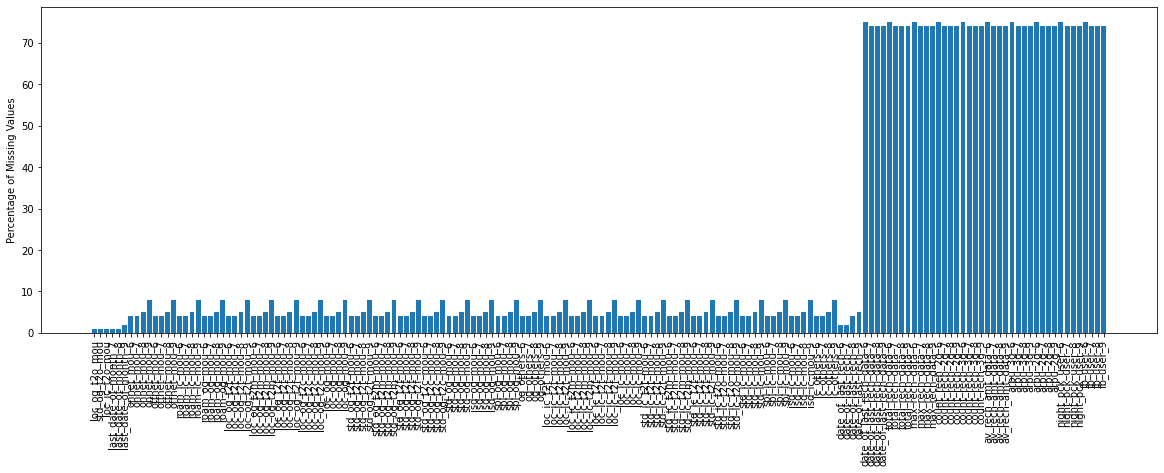

In [10]:
# Checking the percentage of Null Value for different feature

# Generate the values
values = round(df.isnull().sum() / len(df.index), 2) * 100

# Check for the features with missing values
filtered_values = values[values > 0]

# Create a bar plot with a width of 20 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(range(len(filtered_values)), filtered_values)

# Set the x-axis labels
plt.xticks(range(len(filtered_values)), filtered_values.index, rotation=90)

# Set the y-axis label
plt.ylabel('Percentage of Missing Values')

# Show the plot
plt.show()

In [11]:
# Find the features with more than 70% Null value
null_feature = df.columns[(df.isnull().sum() / len(df.index)) * 100 > 70]

print("Number of feature with more then 70% missing values: {}".format(len(null_feature)))

Number of feature with more then 70% missing values: 40


In [12]:
# Removing the columns with more than 70% null value

df = df.drop(null_feature, axis=1)

In [13]:
# new number of instances and  features
df.shape

(99999, 186)

In [14]:
# Finding Unique values of each feature
df.nunique()


mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
loc_og_t2m

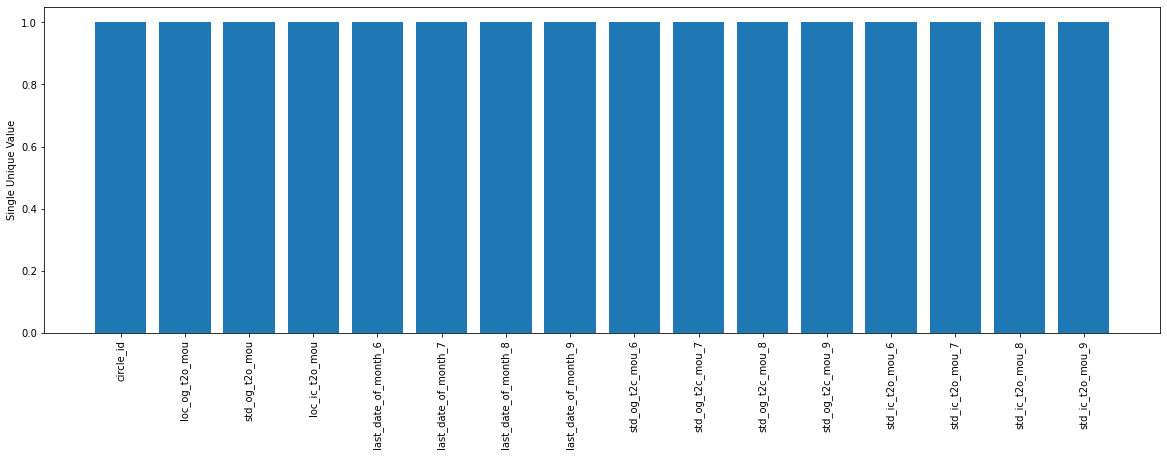

In [15]:
# Checking the percentage of Null Value for different feature

# Generate the values
values = df.nunique()

# Check for the features with missing values
filtered_values = values[values == 1]

# Create a bar plot with a width of 20 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(range(len(filtered_values)), filtered_values)

# Set the x-axis labels
plt.xticks(range(len(filtered_values)), filtered_values.index, rotation=90)

# Set the y-axis label
plt.ylabel('Single Unique Value')

# Show the plot
plt.show()

In [16]:
# Dropping the columns with only one unique value as they will not add any significant contribution
single_feature_value = df.columns[df.nunique() == 1]
df = df.drop(single_feature_value, axis=1)


In [17]:
# new number of instances and features
df.shape

(99999, 170)

In [18]:
# Filling rest of the null value with mean of each column

# select numeric columns only
df_numeric = df.select_dtypes(include=['float64', 'int64']).columns

# fill NaN values with mean of each numeric column
df[df_numeric] = df[df_numeric].fillna(df[df_numeric].mean())

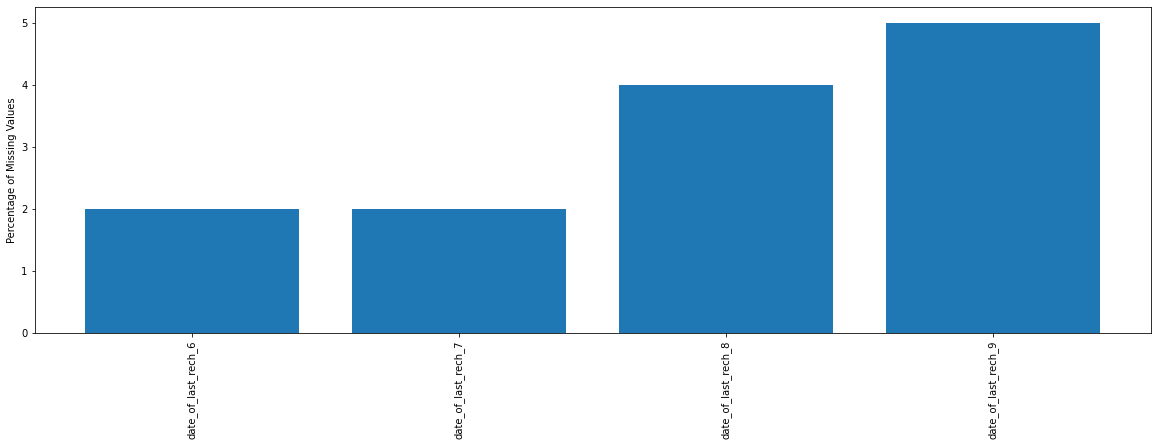

In [19]:
# Plotting the percentage of Null Value
values = round(df.isnull().sum() / len(df.index), 2) * 100

# Filter the values to only include those greater than 30
filtered_values = values[values > 0]

# Create a bar plot with a width of 20 inches and a height of 6 inches
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(range(len(filtered_values)), filtered_values)

# Set the x-axis labels
plt.xticks(range(len(filtered_values)), filtered_values.index, rotation=90)

# Set the y-axis label
plt.ylabel('Percentage of Missing Values')

# Show the plot
plt.show()

In [20]:
# Fill NaN value in date column with zero as date cannot be filled with mean value
df.fillna(0, inplace=True)


In [21]:
# Current Features with percentage of Null Value 
round(df.isnull().sum()/len(df.index), 2) * 100

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
arpu_9                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
onnet_mou_9            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
offnet_mou_9           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_ic_mou_9          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
roam_og_mou_9          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2t_mou_9       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2m_mou_9       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2f_mou_9       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_t2c_mou_9       0.0
l

In [22]:
# The churn is defined as the month where clients left the service and before had it. We take month 9 to decide this

df['target'] = np.where((df['total_ic_mou_9'] == 0.00) & (df['total_og_mou_9'] == 0.00) & (df['vol_2g_mb_9'] == 0.00) & (df['vol_3g_mb_9'] == 0.00), 1, 0)

df.target = df.target.astype("category")

print("Churn:")
print(round(df.target.value_counts() * 100 / df.shape[0], 2))

print("Since the customer churn is only 10.19%, data is unbalanced. Consequently, we need to balance our dataset")

Churn:
0    89.81
1    10.19
Name: target, dtype: float64
Since the customer churn is only 10.19%, data is unbalanced. Consequently, we need to balance our dataset


We observe with the following scatterplots that our problem is not linear


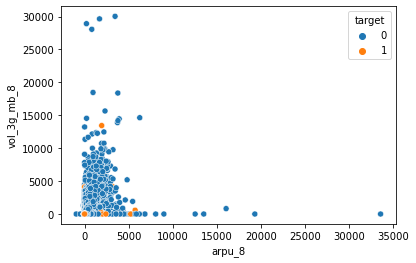

In [23]:
print("We observe with the following scatterplots that our problem is not linear")

sns.scatterplot(data=df, x='arpu_8', y='vol_3g_mb_8', hue=df.target)
plt.show()

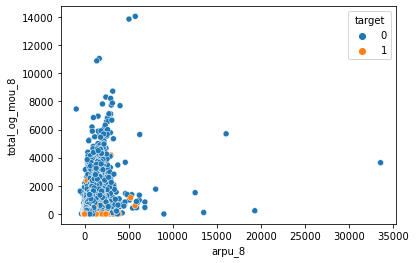

In [24]:
sns.scatterplot(data=df, x='arpu_8', y='total_og_mou_8', hue=df.target)
plt.show()

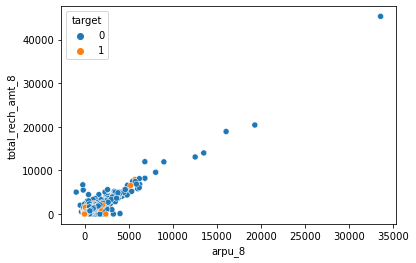

In [25]:
sns.scatterplot(data=df, x='arpu_8', y='total_rech_amt_8', hue=df.target)
plt.show()

In [26]:
# Dropping all the features of month september, as those features will not be used for prediction
df = df.drop(df.filter(regex='_9',axis=1).columns, axis=1)

In [27]:
# We explicit X and y
X = df.select_dtypes(exclude=['object'])
y = df.target

# Preview y
print(y.head())

# We proceed to make the splitting of 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: category
Categories (2, int64): [0, 1]


In [28]:
# Standardize the d-dimensional dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
# We apply LogisticRegression model to obtain accuracy in the whole dataset

lr1 = LogisticRegression(C=1, max_iter=100)

start = timer()
lr1.fit(X_train, y_train)
end = timer()
fitting_time_train = end - start

y_train_pred = lr1.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average = 'macro')
recall_train = recall_score(y_train, y_train_pred, average = 'macro')
f1_train = f1_score(y_train, y_train_pred, average = 'macro')

y_test_pred = lr1.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average = 'macro')
recall_test = recall_score(y_test, y_test_pred, average = 'macro')
f1_test = f1_score(y_test, y_test_pred, average = 'macro')

print('\nPerformance metrics using Logistic Regression classifier:')
print('==========================================================\n')

print('Train fitting time : {:.3f} seconds\n'.format(fitting_time_train))
print('Train Accuracy     : {:.3f}'.format(accuracy_train))
print('Train Precision    : {:.3f}'.format(precision_train))
print('Train Recall       : {:.3f}'.format(recall_train))
print('Train F1           : {:.3f}\n'.format(f1_train))
print('Test Accuracy      : {:.3f}'.format(accuracy_test))
print('Test Precision     : {:.3f}'.format(precision_test))
print('Test Recall        : {:.3f}'.format(recall_test))
print('Test F1            : {:.3f}'.format(f1_test))
print()



Performance metrics using Logistic Regression classifier:

Train fitting time : 0.679 seconds

Train Accuracy     : 0.898
Train Precision    : 0.449
Train Recall       : 0.500
Train F1           : 0.473

Test Accuracy      : 0.898
Test Precision     : 0.449
Test Recall        : 0.500
Test F1            : 0.473




Eigenvalues 
[1.64902109e+01 9.48994693e+00 6.51527888e+00 5.72893970e+00
 4.43588472e+00 3.98218875e+00 3.42126062e+00 3.18346644e+00
 3.14255113e+00 2.98941102e+00 2.88747646e+00 2.81373996e+00
 2.69770886e+00 2.64399514e+00 2.49952394e+00 2.24388525e+00
 2.01745198e+00 1.87353873e+00 1.81455195e+00 1.73744897e+00
 1.70814293e+00 1.58582327e+00 1.46454698e+00 1.45902144e+00
 1.41538628e+00 1.38950541e+00 1.28033444e+00 1.24216861e+00
 1.20249582e+00 1.11443077e+00 1.05857901e+00 1.02534764e+00
 1.00432413e+00 9.53418652e-01 9.43709570e-01 9.32949078e-01
 8.62270615e-01 8.29714984e-01 7.87675190e-01 7.69657623e-01
 7.56139968e-01 7.33994337e-01 7.15394933e-01 6.89309514e-01
 6.70620448e-01 6.54231398e-01 6.29264572e-01 5.94311089e-01
 5.84208887e-01 5.50921141e-01 5.34269187e-01 5.21890367e-01
 5.04378087e-01 4.99703911e-01 4.72963088e-01 4.52697182e-01
 4.46883371e-01 4.42030454e-01 4.32640968e-01 4.18092577e-01
 4.13944121e-01 3.79073195e-01 3.69290166e-01 3.57315870e-01
 3.5376973

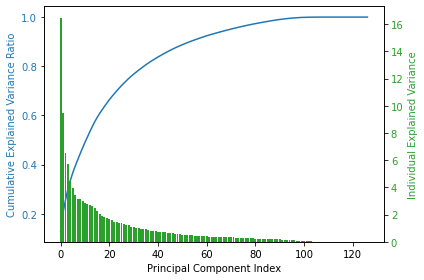

In [30]:
# Covariance matrix and eigenvectors and values
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

# PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio and individual explained variance
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
individual_var = pca.explained_variance_

# Plot cumulative and individual explained variance vs. principal component index
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Principal Component Index')
ax1.set_ylabel('Cumulative Explained Variance Ratio', color=color)
ax1.plot(cumulative_var_ratio, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Individual Explained Variance', color=color)  # we already handled the x-label with ax1
ax2.bar(range(len(individual_var)), individual_var, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [31]:
# We take the features below aprox 85% (the first 50) of cumulative explained variance ratio
first_50_pc = pca.components_[:50]
print(first_50_pc.shape)

# Get feature names
feature_names = df.columns.tolist()

# Print names of features associated with first 50 principal components
for i, pc in enumerate(first_50_pc):
    top_feature_idx = pc.argsort()[::-1][0]
    top_feature_name = feature_names[top_feature_idx]
    print(f"Principal Component {i+1}: {top_feature_name}")

(50, 127)
Principal Component 1: arpu_7
Principal Component 2: std_og_mou_7
Principal Component 3: vol_2g_mb_7
Principal Component 4: std_ic_mou_7
Principal Component 5: loc_og_t2f_mou_7
Principal Component 6: onnet_mou_7
Principal Component 7: loc_og_mou_7
Principal Component 8: isd_og_mou_8
Principal Component 9: roam_ic_mou_7
Principal Component 10: roam_ic_mou_7
Principal Component 11: spl_og_mou_6
Principal Component 12: spl_og_mou_8
Principal Component 13: std_ic_t2f_mou_7
Principal Component 14: isd_ic_mou_7
Principal Component 15: isd_og_mou_7
Principal Component 16: loc_ic_t2t_mou_7
Principal Component 17: og_others_7
Principal Component 18: og_others_7
Principal Component 19: std_ic_t2t_mou_7
Principal Component 20: ic_others_8
Principal Component 21: monthly_3g_7
Principal Component 22: std_ic_t2f_mou_6
Principal Component 23: spl_ic_mou_6
Principal Component 24: roam_ic_mou_7
Principal Component 25: spl_ic_mou_7
Principal Component 26: date_of_last_rech_8
Principal Componen

In [32]:
# We take just the 50 first components
pca50 = PCA(n_components = 50, random_state=100)

X_train_pca50 = pca50.fit_transform(X_train_std)
X_test_pca50 = pca50.transform(X_test_std)

print('X_train_pca50 shape: ',X_train_pca50.shape)
print('X_test_pca50 shape :',X_test_pca50.shape)

X_train_pca50 shape:  (69999, 50)
X_test_pca50 shape : (30000, 50)


Since we precision is not good, we proceed to sample and balance the data:

Before sampling:
  Dataset shape (train sample): (99999, 127)
  Dataset shape (test sample) : (99999,)
After sampling:
  Dataset shape (train sample): (1400, 127)
  Dataset shape (test sample) : (600, 127)


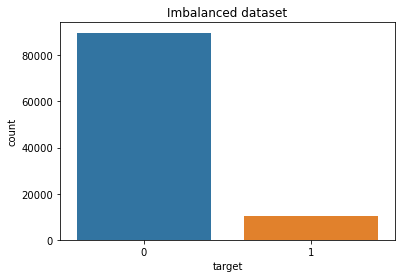

We can see that this dataset is unbalanced. Then, we proceed to balance it.


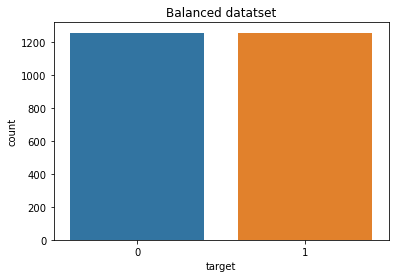

After scaling, we show the first values to demonstrate correct procedure:
 Mean               (train sample): [-3.75903675e-13  1.05987878e-16 -2.26107474e-17 -6.78322421e-17
 -2.26107474e-17]
 Standard deviation (train sample): [1. 1. 1. 1. 1.]
 Mean               (train sample): [ 0.10484705  0.02322722 -0.14836783 -0.07521903 -0.06520702]
 Standard deviation  (test sample): [1.0200847  0.97856352 0.82074844 1.03444321 0.74331449]


In [33]:
# Since the amount of samples is very high (125,730 instances), we proceed to sample
n_instances = 2000

print("Before sampling:")
print("  Dataset shape (train sample):", X.shape)
print("  Dataset shape (test sample) :", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=round(n_instances * 0.7), test_size=round(n_instances * 0.3), stratify=y, random_state=42)

print("After sampling:")
print("  Dataset shape (train sample):", X_train.shape)
print("  Dataset shape (test sample) :", X_test.shape)

# Then, we balance the sets:
sns.countplot(x='target', data=df)
plt.title('Imbalanced dataset')
plt.show()
print("We can see that this dataset is unbalanced. Then, we proceed to balance it.")

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = sm.fit_resample(X_test, y_test)

sns.countplot(x=y_train_balanced)
plt.title('Balanced datatset')
plt.show()

# Standardize the d-dimensional dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_balanced)
X_test_std = sc.transform(X_test_balanced)

print("After scaling, we show the first values to demonstrate correct procedure:")
print(" Mean               (train sample):", X_train_std.mean(axis=0)[:5])
print(" Standard deviation (train sample):", X_train_std.std(axis=0)[:5])
print(" Mean               (train sample):", X_test_std.mean(axis=0)[:5])
print(" Standard deviation  (test sample):", X_test_std.std(axis=0)[:5])

In [34]:
# KPCA
# ====

kpca = KernelPCA(n_components=50, kernel='rbf', gamma=.01) # We choose 50 components since PCA analysis gives that is a good number

start = timer()
X_train_kpca = kpca.fit_transform(X_train_std)
end = timer()
fitting_time_kpca = end - start

X_test_kpca = kpca.transform(X_test_std)

print('KPCA fitting time: {:.3f} seconds'.format(fitting_time_kpca))

KPCA fitting time: 2.982 seconds


In [35]:
# Models
# ======

# Model 1: Linear Regression
# ==========================

lr1 = LogisticRegression(C=1, max_iter=100)

start = timer()
lr1.fit(X_train_kpca, y_train_balanced)
end = timer()
fitting_time_train = end - start

y_train_pred_kpca = lr1.predict(X_train_kpca)

accuracy_train = accuracy_score(y_train_balanced, y_train_pred_kpca)
precision_train = precision_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
recall_train = recall_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
f1_train = f1_score(y_train_balanced, y_train_pred_kpca, average = 'macro')

y_test_pred_kpca = lr1.predict(X_test_kpca)

accuracy_test = accuracy_score(y_test_balanced, y_test_pred_kpca)
precision_test= precision_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
recall_test = recall_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
f1_test = f1_score(y_test_balanced, y_test_pred_kpca, average = 'macro')

print('\nPerformance metrics using Logistic Regression classifier (with PCA_50):')
print('=======================================================================\n')

print('Train fitting time : {:.3f} seconds\n'.format(fitting_time_train))
print('Train Accuracy     : {:.3f}'.format(accuracy_train))
print('Train Precision    : {:.3f}'.format(precision_train))
print('Train Recall       : {:.3f}'.format(recall_train))
print('Train F1           : {:.3f}\n'.format(f1_train))
print('Test Accuracy      : {:.3f}'.format(accuracy_test))
print('Test Precision     : {:.3f}'.format(precision_test))
print('Test Recall        : {:.3f}'.format(recall_test))
print('Test F1            : {:.3f}'.format(f1_test))
print()


Performance metrics using Logistic Regression classifier (with PCA_50):

Train fitting time : 0.068 seconds

Train Accuracy     : 0.986
Train Precision    : 0.986
Train Recall       : 0.986
Train F1           : 0.986

Test Accuracy      : 0.959
Test Precision     : 0.962
Test Recall        : 0.959
Test F1            : 0.959



In [36]:

# Model 2: Decision Tree
# ======================

dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=10)

start = timer()
dec_tree.fit(X_train_kpca, y_train_balanced)
end = timer()
fitting_time_train = end - start

y_train_pred_kpca = dec_tree.predict(X_train_kpca)

accuracy_train = accuracy_score(y_train_balanced, y_train_pred_kpca)
precision_train = precision_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
recall_train = recall_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
f1_train = f1_score(y_train_balanced, y_train_pred_kpca, average = 'macro')

y_test_pred_kpca = dec_tree.predict(X_test_kpca)

accuracy_test = accuracy_score(y_test_balanced, y_test_pred_kpca)
precision_test= precision_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
recall_test = recall_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
f1_test = f1_score(y_test_balanced, y_test_pred_kpca, average = 'macro')

print('\nPerformance metrics using Decision Tree classifier (with PCA_50):')
print('=================================================================\n')

print('Train fitting time : {:.3f} seconds\n'.format(fitting_time_train))
print('Train Accuracy     : {:.3f}'.format(accuracy_train))
print('Train Precision    : {:.3f}'.format(precision_train))
print('Train Recall       : {:.3f}'.format(recall_train))
print('Train F1           : {:.3f}\n'.format(f1_train))
print('Test Accuracy      : {:.3f}'.format(accuracy_test))
print('Test Precision     : {:.3f}'.format(precision_test))
print('Test Recall        : {:.3f}'.format(recall_test))
print('Test F1            : {:.3f}'.format(f1_test))
print()


Performance metrics using Decision Tree classifier (with PCA_50):

Train fitting time : 0.174 seconds

Train Accuracy     : 0.996
Train Precision    : 0.996
Train Recall       : 0.996
Train F1           : 0.996

Test Accuracy      : 0.906
Test Precision     : 0.907
Test Recall        : 0.906
Test F1            : 0.906



In [37]:
# Model 3: KNN (1)
# ================

knbr1 = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', p=2)

start = timer()
knbr1.fit(X_train_kpca, y_train_balanced)
end = timer()
fitting_time_train = end - start

y_train_pred_kpca = knbr1.predict(X_train_kpca)

accuracy_train = accuracy_score(y_train_balanced, y_train_pred_kpca)
precision_train = precision_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
recall_train = recall_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
f1_train = f1_score(y_train_balanced, y_train_pred_kpca, average = 'macro')

y_test_pred_kpca = dec_tree.predict(X_test_kpca)

accuracy_test = accuracy_score(y_test_balanced, y_test_pred_kpca)
precision_test= precision_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
recall_test = recall_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
f1_test = f1_score(y_test_balanced, y_test_pred_kpca, average = 'macro')

print('\nPerformance metrics using K-Nearest Neighbor classifier (with PCA_50):')
print('======================================================================\n')

print('Train fitting time : {:.3f} seconds\n'.format(fitting_time_train))
print('Train Accuracy     : {:.3f}'.format(accuracy_train))
print('Train Precision    : {:.3f}'.format(precision_train))
print('Train Recall       : {:.3f}'.format(recall_train))
print('Train F1           : {:.3f}\n'.format(f1_train))
print('Test Accuracy      : {:.3f}'.format(accuracy_test))
print('Test Precision     : {:.3f}'.format(precision_test))
print('Test Recall        : {:.3f}'.format(recall_test))
print('Test F1            : {:.3f}'.format(f1_test))
print()



Performance metrics using K-Nearest Neighbor classifier (with PCA_50):

Train fitting time : 0.002 seconds

Train Accuracy     : 0.989
Train Precision    : 0.989
Train Recall       : 0.989
Train F1           : 0.989

Test Accuracy      : 0.906
Test Precision     : 0.907
Test Recall        : 0.906
Test F1            : 0.906



In [38]:
# Model 4: KNN (2)
# ================

knbr2 = KNeighborsClassifier(n_neighbors=40, weights = 'uniform', p=2)

start = timer()
knbr2.fit(X_train_kpca, y_train_balanced)
end = timer()
fitting_time_train = end - start

y_train_pred_kpca = knbr2.predict(X_train_kpca)

accuracy_train = accuracy_score(y_train_balanced, y_train_pred_kpca)
precision_train = precision_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
recall_train = recall_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
f1_train = f1_score(y_train_balanced, y_train_pred_kpca, average = 'macro')

y_test_pred_kpca = dec_tree.predict(X_test_kpca)

accuracy_test = accuracy_score(y_test_balanced, y_test_pred_kpca)
precision_test= precision_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
recall_test = recall_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
f1_test = f1_score(y_test_balanced, y_test_pred_kpca, average = 'macro')

print('\nPerformance metrics using K-Nearest Neighbor classifier (with PCA_50):')
print('======================================================================\n')

print('Train fitting time : {:.3f} seconds\n'.format(fitting_time_train))
print('Train Accuracy     : {:.3f}'.format(accuracy_train))
print('Train Precision    : {:.3f}'.format(precision_train))
print('Train Recall       : {:.3f}'.format(recall_train))
print('Train F1           : {:.3f}\n'.format(f1_train))
print('Test Accuracy      : {:.3f}'.format(accuracy_test))
print('Test Precision     : {:.3f}'.format(precision_test))
print('Test Recall        : {:.3f}'.format(recall_test))
print('Test F1            : {:.3f}'.format(f1_test))
print()



Performance metrics using K-Nearest Neighbor classifier (with PCA_50):

Train fitting time : 0.002 seconds

Train Accuracy     : 0.916
Train Precision    : 0.922
Train Recall       : 0.916
Train F1           : 0.916

Test Accuracy      : 0.906
Test Precision     : 0.907
Test Recall        : 0.906
Test F1            : 0.906



In [39]:
# Model 5: AdaBoost
# =================

base_estimator = DecisionTreeClassifier(max_depth=1)
ab = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=50, learning_rate=0.5)

start = timer()
ab.fit(X_train_kpca, y_train_balanced)
end = timer()
fitting_time_train = end - start
y_train_pred_kpca = ab.predict(X_train_kpca)

accuracy_train = accuracy_score(y_train_balanced, y_train_pred_kpca)
precision_train = precision_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
recall_train = recall_score(y_train_balanced, y_train_pred_kpca, average = 'macro')
f1_train = f1_score(y_train_balanced, y_train_pred_kpca, average = 'macro')

y_test_pred_kpca = ab.predict(X_test_kpca)

accuracy_test = accuracy_score(y_test_balanced, y_test_pred_kpca)
precision_test= precision_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
recall_test = recall_score(y_test_balanced, y_test_pred_kpca, average = 'macro')
f1_test = f1_score(y_test_balanced, y_test_pred_kpca, average = 'macro')

print('\nPerformance metrics using AdaBoost classifier (with PCA_50):')
print('============================================================\n')

print('Train fitting time : {:.3f} seconds\n'.format(fitting_time_train))
print('Train Accuracy     : {:.3f}'.format(accuracy_train))
print('Train Precision    : {:.3f}'.format(precision_train))
print('Train Recall       : {:.3f}'.format(recall_train))
print('Train F1           : {:.3f}\n'.format(f1_train))
print('Test Accuracy      : {:.3f}'.format(accuracy_test))
print('Test Precision     : {:.3f}'.format(precision_test))
print('Test Recall        : {:.3f}'.format(recall_test))
print('Test F1            : {:.3f}'.format(f1_test))
print()


Performance metrics using AdaBoost classifier (with PCA_50):

Train fitting time : 0.826 seconds

Train Accuracy     : 0.983
Train Precision    : 0.983
Train Recall       : 0.983
Train F1           : 0.983

Test Accuracy      : 0.954
Test Precision     : 0.955
Test Recall        : 0.954
Test F1            : 0.954

